In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('./data/df_with_topics.csv')
df.head()

,date_of_incident,date_of_death,age,gender,race,latino,manner_of_death,primary_cause,primary_cause_line_a,primary_cause_line_b,...,death_date,death_time,death_day,inc_date,inc_time,inc_day,long_topic,best_topic_num,best_topic_name,best_topic_perc
0,2023-10-24 00:43:00,2023-10-25 00:11:00,22.0,1,Black,0,ACCIDENT,MULTIPLE BLUNT FORCE INJURIES. MOTOR VEHICLE C...,MULTIPLE BLUNT FORCE INJURIES,MOTOR VEHICLE COLLISION,...,2023-10-25,00:11:00,Wednesday,2023-10-24,00:43:00,Tuesday,"[(0, 0.0100428155), (1, 0.01559641), (2, 0.948...",2,vehicle_collision,0.948506
1,2023-10-24 22:30:00,2023-10-24 21:51:00,35.0,0,Black,0,HOMICIDE,MULTIPLE GUNSHOT WOUNDS,MULTIPLE GUNSHOT WOUNDS,no_text,...,2023-10-24,21:51:00,Tuesday,2023-10-24,22:30:00,Tuesday,"[(0, 0.018974014), (1, 0.91878027), (2, 0.0133...",1,gunshot_wounds_fall,0.918780
2,2023-10-24 21:18:00,2023-10-24 20:36:00,54.0,0,White,0,SUICIDE,GUNSHOT WOUND OF HEAD,GUNSHOT WOUND OF HEAD,no_text,...,2023-10-24,20:36:00,Tuesday,2023-10-24,21:18:00,Tuesday,"[(0, 0.90828776), (1, 0.029466497), (2, 0.0133...",0,one_gunshot_wound,0.908288
3,2023-10-24 07:48:00,2023-10-24 07:16:00,19.0,0,Black,0,HOMICIDE,MULTIPLE GUNSHOT WOUNDS,MULTIPLE GUNSHOT WOUNDS,no_text,...,2023-10-24,07:16:00,Tuesday,2023-10-24,07:48:00,Tuesday,"[(0, 0.018974014), (1, 0.91878027), (2, 0.0133...",1,gunshot_wounds_fall,0.918780
4,2023-10-23 22:21:00,2023-10-23 21:29:00,41.0,0,Black,0,HOMICIDE,MULTIPLE GUNSHOT WOUNDS,MULTIPLE GUNSHOT WOUNDS,no_text,...,2023-10-23,21:29:00,Monday,2023-10-23,22:21:00,Monday,"[(0, 0.018974014), (1, 0.91878027), (2, 0.0133...",1,gunshot_wounds_fall,0.918780


In [5]:
df.columns

Index(['date_of_incident', 'date_of_death', 'age', 'gender', 'race', 'latino',
       'manner_of_death', 'primary_cause', 'primary_cause_line_a',
       'primary_cause_line_b', 'primary_cause_line_c', 'secondary_cause',
       'gun_related', 'opioid_related', 'cold_related', 'heat_related',
       'commissioner_district', 'incident_city', 'incident_zip_code',
       'longitude', 'latitude', 'residence_city', 'residence_zip',
       'chicago_community_area', 'covid_related', 'age_range', 'death_date',
       'death_time', 'death_day', 'inc_date', 'inc_time', 'inc_day',
       'long_topic', 'best_topic_num', 'best_topic_name', 'best_topic_perc'],
      dtype='object')

In [6]:
# Data Overview
print(df.shape)  # Check the number of rows and columns
print(df.info())  # Data types and missing values
print(df.head())  # Display the first few rows

(37151, 36)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37151 entries, 0 to 37150
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date_of_incident        36688 non-null  object 
 1   date_of_death           37151 non-null  object 
 2   age                     37151 non-null  float64
 3   gender                  37151 non-null  int64  
 4   race                    37151 non-null  object 
 5   latino                  37151 non-null  int64  
 6   manner_of_death         37151 non-null  object 
 7   primary_cause           37151 non-null  object 
 8   primary_cause_line_a    37151 non-null  object 
 9   primary_cause_line_b    37151 non-null  object 
 10  primary_cause_line_c    37151 non-null  object 
 11  secondary_cause         37151 non-null  object 
 12  gun_related             37151 non-null  int64  
 13  opioid_related          37151 non-null  int64  
 14  cold_related            37

In [8]:
# Summary Statistics for Numerical Columns
print(df.describe())

                age       gender        latino   gun_related  opioid_related  \
count  3.715100e+04  37151.00000  37151.000000  37151.000000    37151.000000   
mean   7.810681e+04      0.24640      0.136497      0.222713        0.339291   
std    2.792864e+06      0.43092      0.343320      0.416073        0.473475   
min    0.000000e+00      0.00000      0.000000      0.000000        0.000000   
25%    3.000000e+01      0.00000      0.000000      0.000000        0.000000   
50%    4.600000e+01      0.00000      0.000000      0.000000        0.000000   
75%    6.000000e+01      0.00000      0.000000      0.000000        1.000000   
max    1.000000e+08      1.00000      1.000000      1.000000        1.000000   

       cold_related  heat_related     longitude      latitude  covid_related  \
count  37151.000000  37151.000000  37151.000000  37151.000000   37151.000000   
mean       0.013916      0.000673    -86.292739     41.147287       0.006729   
std        0.117145      0.025933     1

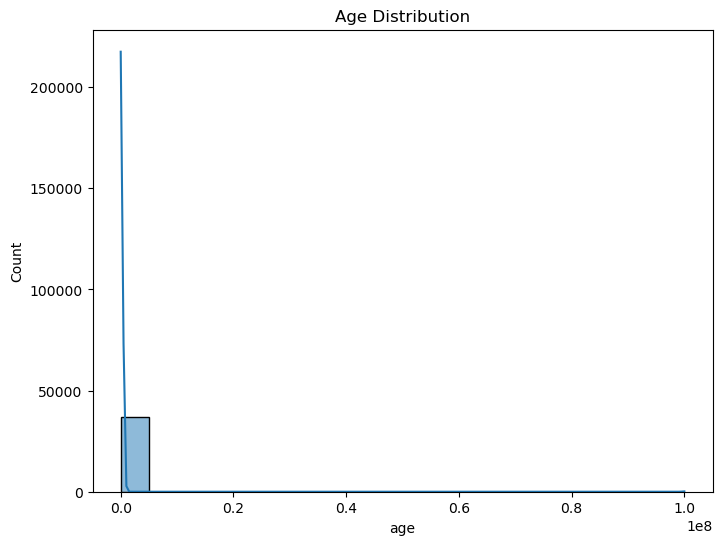